In [ ]:
!pip install pyreadstat

import pyreadstat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore


%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Macbook/Dissertation/SPSS/industry.SAV"
data, meta = pyreadstat.read_sav(file_path)
data.head()

Mounted at /content/drive


INTNR  dsk2  nace  Q002.1  Q002.2  fin_nace  \
0  3305.0   2.0  23.0     2.0    32.0      32.0   
1  4023.0   1.0  27.0     2.0    32.0      32.0   
2     3.0   2.0  16.0     2.0    32.0      32.0   
3   290.0   2.0  26.0     2.0    32.0      32.0   
4  1767.0   2.0  25.0     2.0    32.0      32.0   

                                        TQ002.3o  Q003  Q003o  Q004  ...  \
0                      Aliuminio langai,fasadai.   1.0    NaN   1.0  ...   
1    Medicininini≈≥ elektronini≈≥ prietais≈≥ gamyba   1.0    NaN   2.0  ...   
2                                         Malkos   8.0   15.0   4.0  ...   
3                medicininƒó ƒØranga, inkubatoriai   8.0   10.0   3.0  ...   
4  Centrinio ≈°ildymo radiatori≈≥ ir katil≈≥ gamyba   1.0    NaN   1.0  ...   

   Q033.4  Q033.5  Q033.7  Q034  region  profit_before_tax2021  \
0     0.0     0.0  2020.0   1.0     6.0                36551.0   
1     5.0     0.0  2017.0   1.0     1.0                    NaN   
2     0.0     0.0  2012.0   1.0    10.0                    NaN   
3     4.0     0.0  2010.0   1.0     2.0                    NaN   
4     3.0     NaN  2008.0   1.0     2.0               327308.0   

   net_profit2021  avgWage  numInsured2  avgWage2  
0         30752.0      NaN          0.0       NaN  
1             NaN      NaN          0.0       NaN  
2             NaN      NaN          0.0       NaN  
3             NaN      NaN          0.0       NaN  
4        273056.0      NaN          0.0       NaN  

[5 rows x 108 columns]

In [3]:
# Identify columns that start with "TQ"
columns_to_drop = [col for col in data.columns if col.startswith("TQ")]

# Drop them
df = data.drop(columns=columns_to_drop)

# Preview the cleaned data
df.head()


INTNR  dsk2  nace  Q002.1  Q002.2  fin_nace  Q003  Q003o  Q004  Q005  ...  \
0  3305.0   2.0  23.0     2.0    32.0      32.0   1.0    NaN   1.0   1.0  ...   
1  4023.0   1.0  27.0     2.0    32.0      32.0   1.0    NaN   2.0   1.0  ...   
2     3.0   2.0  16.0     2.0    32.0      32.0   8.0   15.0   4.0   1.0  ...   
3   290.0   2.0  26.0     2.0    32.0      32.0   8.0   10.0   3.0   1.0  ...   
4  1767.0   2.0  25.0     2.0    32.0      32.0   1.0    NaN   1.0   1.0  ...   

   Q033.4  Q033.5  Q033.7  Q034  region  profit_before_tax2021  \
0     0.0     0.0  2020.0   1.0     6.0                36551.0   
1     5.0     0.0  2017.0   1.0     1.0                    NaN   
2     0.0     0.0  2012.0   1.0    10.0                    NaN   
3     4.0     0.0  2010.0   1.0     2.0                    NaN   
4     3.0     NaN  2008.0   1.0     2.0               327308.0   

   net_profit2021  avgWage  numInsured2  avgWage2  
0         30752.0      NaN          0.0       NaN  
1             NaN      NaN          0.0       NaN  
2             NaN      NaN          0.0       NaN  
3             NaN      NaN          0.0       NaN  
4        273056.0      NaN          0.0       NaN  

[5 rows x 67 columns]

In [4]:
# Define the columns you want to keep
main_cols = [
    "fin_nace", "Q033.1", "Q033.2", "Q033.3", "Q033",
    "profit_before_tax2021", "net_profit2021"
]

# Add Q016.1 to Q028.3
question_cols = [f"Q{str(i).zfill(3)}.{j}" for i in range(18, 29) for j in range(1, 4)]

# Combine all target columns
columns_to_keep = main_cols + question_cols

# Keep only those columns that exist in your data
existing_cols = [col for col in columns_to_keep if col in df.columns]

# Create the filtered dataset
df_cleaned = df[existing_cols].copy()


In [5]:
# See info and first few rows
df_cleaned.info()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fin_nace               506 non-null    float64
 1   Q033.1                 495 non-null    float64
 2   Q033.2                 364 non-null    float64
 3   Q033.3                 398 non-null    float64
 4   Q033                   506 non-null    float64
 5   profit_before_tax2021  363 non-null    float64
 6   net_profit2021         363 non-null    float64
 7   Q018.1                 359 non-null    float64
 8   Q018.2                 392 non-null    float64
 9   Q018.3                 394 non-null    float64
 10  Q019.1                 355 non-null    float64
 11  Q019.2                 317 non-null    float64
 12  Q019.3                 364 non-null    float64
 13  Q020.1                 407 non-null    float64
 14  Q020.2                 387 non-null    float64
 15  Q020.3

fin_nace     Q033.1  Q033.2  Q033.3  Q033  profit_before_tax2021  \
0      32.0  1073924.0     3.0     3.0  16.0                36551.0   
1      32.0        NaN     3.0     NaN   7.0                    NaN   
2      32.0   900000.0     5.0     4.0  13.0                    NaN   
3      32.0  6500000.0     4.0     4.0  72.0                    NaN   
4      32.0  3839360.0     5.0     2.0  46.0               327308.0   

   net_profit2021  Q018.1  Q018.2  Q018.3  ...  Q025.3  Q026.1  Q026.2  \
0         30752.0     2.0     4.0     4.0  ...     2.0     2.0     2.0   
1             NaN     3.0     5.0     NaN  ...     3.0     NaN     2.0   
2             NaN     1.0     1.0     1.0  ...     1.0     1.0     1.0   
3             NaN     5.0     4.0     5.0  ...     NaN     NaN     NaN   
4        273056.0     1.0     5.0     5.0  ...     1.0     1.0     1.0   

   Q026.3  Q027.1  Q027.2  Q027.3  Q028.1  Q028.2  Q028.3  
0     2.0     2.0     3.0     2.0     2.0     2.0     3.0  
1     NaN     NaN     NaN     NaN     2.0     3.0     NaN  
2     1.0     1.0     1.0     1.0     1.0     1.0     NaN  
3     NaN     NaN     NaN     NaN     5.0     5.0     NaN  
4     1.0     1.0     1.0     1.0     1.0     1.0     1.0  

[5 rows x 40 columns]

In [6]:
df_renamed = df_cleaned.rename(columns={
    "fin_nace": "sector",
    "Q033.1": "annual_turnover",
    "Q033.2": "return_on_sales",
    "Q033.3": "exports_percent",
    "Q033": "num_employees",
    "profit_before_tax2021": "gross_profit",
    "net_profit2021": "net_profit",

    "Q018.1": "ERP production_planning_software",
    "Q018.2": "order_tracking_software",
    "Q018.3": "MES integrated_operations_software",

    "Q019.1": "industrial_robots_usage",
    "Q019.2": "collaborative_robots_usage",
    "Q019.3": "process_automation",

    "Q020.1": "cad_software_usage",
    "Q020.2": "cnc_equipment_usage",
    "Q020.3": "3d_printing_prototyping",

    "Q021.1": "shopfloor_tablet_use",
    "Q021.2": "interactive_production_instructions",
    "Q021.3": "paperless_production",

    "Q022.1": "inventory_tracking_raw_materials",
    "Q022.2": "automatic_ordering_solutions",
    "Q022.3": "inventory_tracking_finished_goods",

    "Q023.1": "work_center_data_collection",
    "Q023.2": "wip_tracking_rfid_barcode",
    "Q023.3": "downtime_data_collection",

    "Q024.1": "ai_quality_control",
    "Q024.2": "ai_demand_forecasting",
    "Q024.3": "ai_predictive_maintenance",

    "Q025.1": "simulation_root_cause_analysis",
    "Q025.2": "process_mining",
    "Q025.3": "simulation_schedule_prediction",

    "Q026.1": "ar_asset_identification",
    "Q026.2": "ar_training",
    "Q026.3": "ar_maintenance_management",

    "Q027.1": "automated_production_lines",
    "Q027.2": "autonomous_production_control",
    "Q027.3": "autonomous_data_analysis",

    "Q028.1": "info_sharing_with_suppliers",
    "Q028.2": "collaborative_planning_with_suppliers",
    "Q028.3": "system_integration_with_suppliers",
})

In [7]:
df_renamed

sector  annual_turnover  return_on_sales  exports_percent  num_employees  \
0      32.0        1073924.0              3.0              3.0           16.0   
1      32.0              NaN              3.0              NaN            7.0   
2      32.0         900000.0              5.0              4.0           13.0   
3      32.0        6500000.0              4.0              4.0           72.0   
4      32.0        3839360.0              5.0              2.0           46.0   
..      ...              ...              ...              ...            ...   
501    11.0        1000000.0              1.0              1.0            7.0   
502    16.0         815110.0              NaN              3.0           31.0   
503    13.0        2192224.0              2.0              3.0           61.0   
504    16.0       10964752.0              2.0              4.0          216.0   
505    25.0         528606.0              5.0              1.0            9.0   

     gross_profit  net_profit  ERP production_planning_software  \
0         36551.0     30752.0                               2.0   
1             NaN         NaN                               3.0   
2             NaN         NaN                               1.0   
3             NaN         NaN                               5.0   
4        327308.0    273056.0                               1.0   
..            ...         ...                               ...   
501           NaN         NaN                               2.0   
502        2215.0      2115.0                               NaN   
503      148542.0    148542.0                               2.0   
504     -190611.0   -190611.0                               4.0   
505           NaN         NaN                               NaN   

     order_tracking_software  MES integrated_operations_software  ...  \
0                        4.0                                 4.0  ...   
1                        5.0                                 NaN  ...   
2                        1.0                                 1.0  ...   
3                        4.0                                 5.0  ...   
4                        5.0                                 5.0  ...   
..                       ...                                 ...  ...   
501                      4.0                                 2.0  ...   
502                      NaN                                 NaN  ...   
503                      2.0                                 2.0  ...   
504                      4.0                                 4.0  ...   
505                      NaN                                 NaN  ...   

     simulation_schedule_prediction  ar_asset_identification  ar_training  \
0                               2.0                      2.0          2.0   
1                               3.0                      NaN          2.0   
2                               1.0                      1.0          1.0   
3                               NaN                      NaN          NaN   
4                               1.0                      1.0          1.0   
..                              ...                      ...          ...   
501                             2.0                      1.0          1.0   
502                             2.0                      NaN          2.0   
503                             4.0                      2.0          1.0   
504                             4.0                      4.0          4.0   
505                             NaN                      NaN          NaN   

     ar_maintenance_management  automated_production_lines  \
0                          2.0                         2.0   
1                          NaN                         NaN   
2                          1.0                         1.0   
3                          NaN                         NaN   
4                          1.0                         1.0   
..                         ...                       

In [8]:
df_renamed.isna().sum()

sector                                     0
annual_turnover                           11
return_on_sales                          142
exports_percent                          108
num_employees                              0
gross_profit                             143
net_profit                               143
ERP production_planning_software         147
order_tracking_software                  114
MES integrated_operations_software       112
industrial_robots_usage                  151
collaborative_robots_usage               189
process_automation                       142
cad_software_usage                        99
cnc_equipment_usage                      119
3d_printing_prototyping                  171
shopfloor_tablet_use                      87
interactive_production_instructions       92
paperless_production                      49
inventory_tracking_raw_materials          48
automatic_ordering_solutions             116
inventory_tracking_finished_goods         61
work_center_data_collection              116
wip_tracking_rfid_barcode                153
downtime_data_collection                 141
ai_quality_control                       174
ai_demand_forecasting                    190
ai_predictive_maintenance                183
simulation_root_cause_analysis           178
process_mining                           158
simulation_schedule_prediction           162
ar_asset_identification                  166
ar_training                              157
ar_maintenance_management                164
automated_production_lines               153
autonomous_production_control            122
autonomous_data_analysis                 119
info_sharing_with_suppliers               97
collaborative_planning_with_suppliers    118
system_integration_with_suppliers        144
dtype: int64

In [9]:
sector_names = {
    10.0: 'Manufacture of food products',
    11.0: 'Beverage production',
    12.0: 'Manufacture of tobacco products',
    13.0: 'Production of textile products',
    14.0: 'Garment sewing (production)',
    15.0: 'Manufacture of leather and leather products',
    16.0: 'Manufacture of wood and of products of wood and cork, except furniture, manufacture of articles of straw',
    17.0: 'Manufacture of paper and paper products',
    18.0: 'Printing and reproduction of recorded media',
    19.0: 'Manufacture of coke and refined petroleum products',
    20.0: 'Manufacture of chemicals and chemical products',
    21.0: 'Manufacture of basic pharmaceutical products and pharmaceutical preparations',
    22.0: 'Manufacture of rubber and plastic products',
    23.0: 'Manufacture of other non-metallic mineral products',
    24.0: 'Production of basic metals',
    25.0: 'Manufacture of fabricated metal products other than machinery and equipment',
    26.0: 'Manufacture of computer, electronic and optical products',
    27.0: 'Manufacture of electrical equipment',
    28.0: 'Manufacture of machinery and equipment not elsewhere classified',
    29.0: 'Manufacture of motor vehicles, trailers and semi-trailers',
    30.0: 'Manufacture of other vehicles and equipment',
    31.0: 'Furniture production',
    32.0: 'Other production',
    33.0: 'Repair and installation of machinery and equipment'
}

In [10]:
# Create a new column with sector names
df_renamed["sector_name"] = df_renamed["sector"].map(sector_names)


In [11]:
df_renamed.head()

sector  annual_turnover  return_on_sales  exports_percent  num_employees  \
0    32.0        1073924.0              3.0              3.0           16.0   
1    32.0              NaN              3.0              NaN            7.0   
2    32.0         900000.0              5.0              4.0           13.0   
3    32.0        6500000.0              4.0              4.0           72.0   
4    32.0        3839360.0              5.0              2.0           46.0   

   gross_profit  net_profit  ERP production_planning_software  \
0       36551.0     30752.0                               2.0   
1           NaN         NaN                               3.0   
2           NaN         NaN                               1.0   
3           NaN         NaN                               5.0   
4      327308.0    273056.0                               1.0   

   order_tracking_software  MES integrated_operations_software  ...  \
0                      4.0                                 4.0  ...   
1                      5.0                                 NaN  ...   
2                      1.0                                 1.0  ...   
3                      4.0                                 5.0  ...   
4                      5.0                                 5.0  ...   

   ar_asset_identification  ar_training  ar_maintenance_management  \
0                      2.0          2.0                        2.0   
1                      NaN          2.0                        NaN   
2                      1.0          1.0                        1.0   
3                      NaN          NaN                        NaN   
4                      1.0          1.0                        1.0   

   automated_production_lines  autonomous_production_control  \
0                         2.0                            3.0   
1                         NaN                            NaN   
2                         1.0                            1.0   
3                         NaN                            NaN   
4                         1.0                            1.0   

   autonomous_data_analysis  info_sharing_with_suppliers  \
0                       2.0                          2.0   
1                       NaN                          2.0   
2                       1.0                          1.0   
3                       NaN                          5.0   
4                       1.0                          1.0   

   collaborative_planning_with_suppliers  system_integration_with_suppliers  \
0                                    2.0                                3.0   
1                                    3.0                                NaN   
2                                    1.0                                NaN   
3                                    5.0                                NaN   
4                                    1.0                                1.0   

        sector_name  
0  Other production  
1  Other production  
2  Other production  
3  Other production  
4  Other production  

[5 rows x 41 columns]

In [12]:
sector_map = {
    # Industrial Machinery
    'Manufacture of machinery and equipment not elsewhere classified': 'Industrial Machinery',
    'Repair and installation of machinery and equipment': 'Industrial Machinery',

    # Food and Beverages
    'Manufacture of food products': 'Food and Beverages',
    'Beverage production': 'Food and Beverages',

    # Metals
    'Production of basic metals': 'Metals',
    'Manufacture of fabricated metal products other than machinery and equipment': 'Metals',

    # Consumer Products
    'Furniture production': 'Consumer Products',
    'Garment sewing (production)': 'Consumer Products',
    'Printing and reproduction of recorded media': 'Consumer Products',
    'Manufacture of tobacco products': 'Consumer Products',
    'Other production': 'Consumer Products',

    # Electronic Components
    'Manufacture of computer, electronic and optical products': 'Electronic Components',
    'Manufacture of electrical equipment': 'Electronic Components',

    # Plastics
    'Manufacture of rubber and plastic products': 'Plastics',

    # Textile
    'Production of textile products': 'Textile',
    'Manufacture of leather and leather products': 'Textile',

    # Automotive Components
    'Manufacture of motor vehicles, trailers and semi-trailers': 'Automotive Components',
    'Manufacture of other vehicles and equipment': 'Automotive Components',

    # Construction Materials
    'Manufacture of other non-metallic mineral products': 'Construction Materials',
    'Manufacture of wood and of products of wood and cork, except furniture, manufacture of articles of straw': 'Construction Materials',

    # Chemicals
    'Manufacture of chemicals and chemical products': 'Chemicals',
    'Manufacture of basic pharmaceutical products and pharmaceutical preparations': 'Chemicals',

    # Medical Devices (optional placeholder ‚Äî no clear sector unless added manually)
    # '...': 'Medical Devices',

    # Everything else
    'Manufacture of coke and refined petroleum products': 'Other',
    'Manufacture of paper and paper products': 'Other',
}


In [13]:
df_renamed["sector_map"] = df_renamed["sector_name"].map(sector_map)


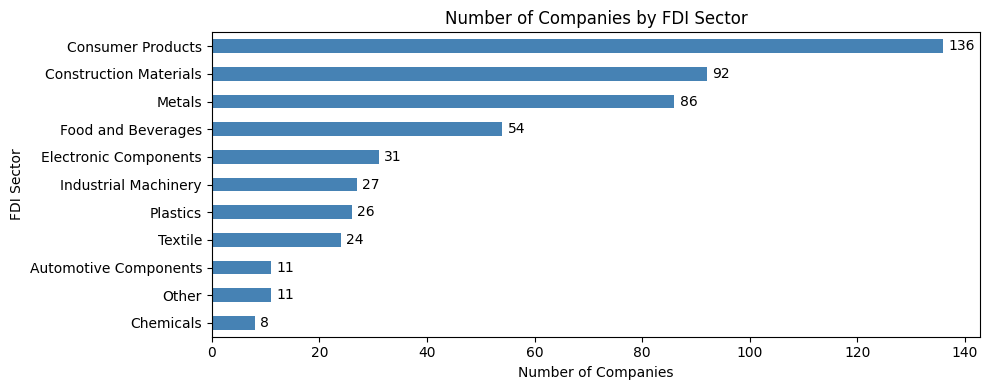

In [14]:
# Count companies by FDI sector
sector_counts = df_renamed["sector_map"].value_counts().sort_values()

# Plot with horizontal bars
ax = sector_counts.plot(kind="barh", figsize=(10, 4), color="steelblue")
plt.title("Number of Companies by FDI Sector")
plt.xlabel("Number of Companies")
plt.ylabel("FDI Sector")

# Add text labels for each bar
for bar in ax.patches:
    count = int(bar.get_width())
    ax.text(bar.get_width() + 1,                   # position a bit to the right
            bar.get_y() + bar.get_height() / 2,    # center vertically
            str(count),
            va='center')

plt.tight_layout()
plt.show()


In [15]:
sector_counts = df_renamed["sector_map"].value_counts().sort_values(ascending=False)
sector_counts

sector_map
Consumer Products         136
Construction Materials     92
Metals                     86
Food and Beverages         54
Electronic Components      31
Industrial Machinery       27
Plastics                   26
Textile                    24
Other                      11
Automotive Components      11
Chemicals                   8
Name: count, dtype: int64

In [16]:
sector_counts.sum()

np.int64(506)

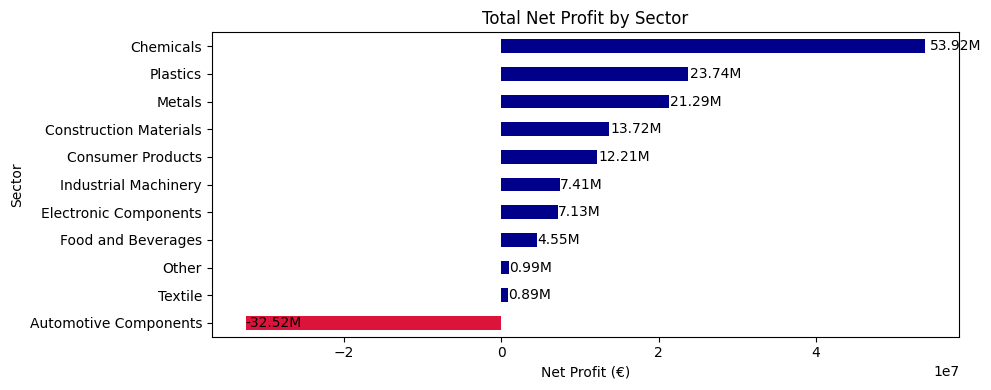

In [17]:
sector_profit = df_renamed.groupby("sector_map")["net_profit"].sum().sort_values(ascending=True)

colors = ['crimson' if val < 0 else 'darkblue' for val in sector_profit]
# Plot
ax = sector_profit.plot(kind="barh", figsize=(10, 4), color=colors)
plt.title("Total Net Profit by Sector")
plt.xlabel("Net Profit (‚Ç¨)")
plt.ylabel("Sector")

# Add value labels in millions
for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + (width * 0.01 if width > 0 else 10000),  # adjust spacing
            bar.get_y() + bar.get_height() / 2,
            f"{width/1_000_000:.2f}M",
            va='center')

plt.tight_layout()
plt.show()

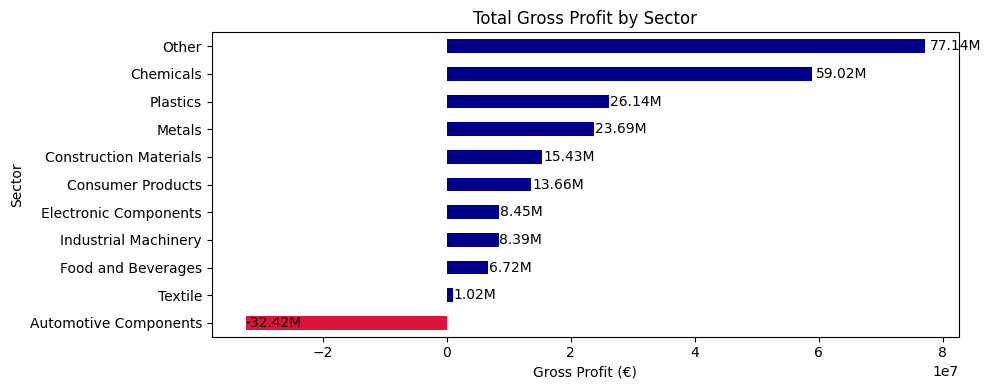

In [18]:
sector_profit = df_renamed.groupby("sector_map")["gross_profit"].sum().sort_values(ascending=True)

colors = ['crimson' if val < 0 else 'darkblue' for val in sector_profit]
# Plot
ax = sector_profit.plot(kind="barh", figsize=(10, 4), color=colors)
plt.title("Total Gross Profit by Sector")
plt.xlabel("Gross Profit (‚Ç¨)")
plt.ylabel("Sector")

# Add value labels in millions
for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + (width * 0.01 if width > 0 else 10000),  # adjust spacing
            bar.get_y() + bar.get_height() / 2,
            f"{width/1_000_000:.2f}M",
            va='center')

plt.tight_layout()
plt.show()

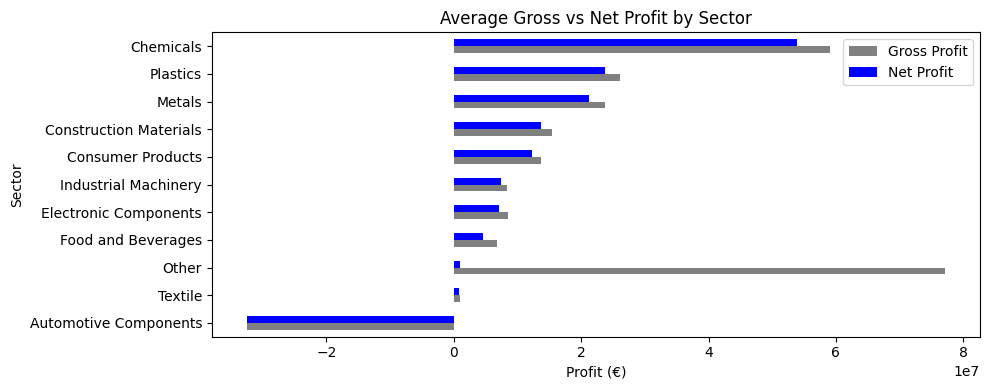

In [19]:
# Group data
sector_profit = df_renamed.groupby("sector_map")[["gross_profit", "net_profit"]].sum().sort_values("net_profit")

# Plot
ax = sector_profit.plot(kind="barh", figsize=(10, 4), color=["gray", "blue"])

# Styling
plt.title("Average Gross vs Net Profit by Sector")
plt.xlabel("Profit (‚Ç¨)")
plt.ylabel("Sector")
plt.legend(["Gross Profit", "Net Profit"])
plt.tight_layout()
plt.show()

In [20]:
def classify_company_size(n):
    if n <= 9:
        return "1‚Äì9"
    elif n <= 49:
        return "10‚Äì49"
    elif n <= 249:
        return "50‚Äì249"
    else:
        return "250+"


In [21]:
df_renamed["company_size_group"] = df_renamed["num_employees"].apply(classify_company_size)

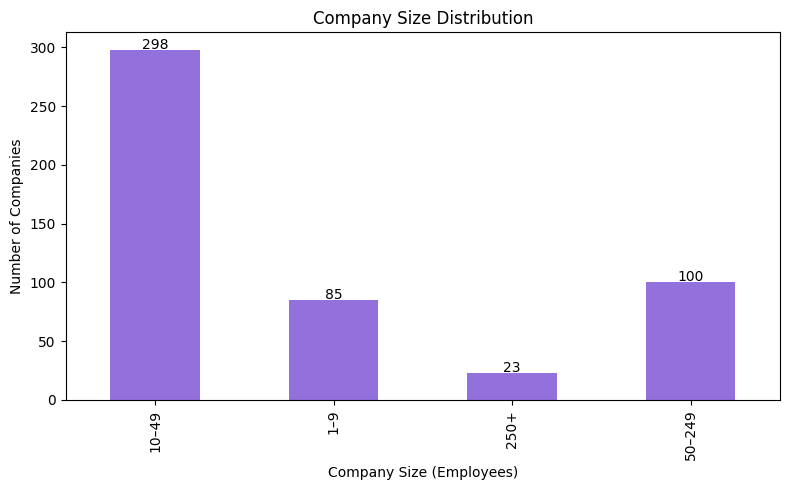

In [22]:
size_distribution = df_renamed["company_size_group"].value_counts().sort_index()

# Plot it
ax = size_distribution.plot(kind="bar", figsize=(8, 5), color="mediumpurple")
plt.title("Company Size Distribution")
plt.xlabel("Company Size (Employees)")
plt.ylabel("Number of Companies")

# Add labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height + 1,
            str(int(height)),
            ha='center')

plt.tight_layout()
plt.show()


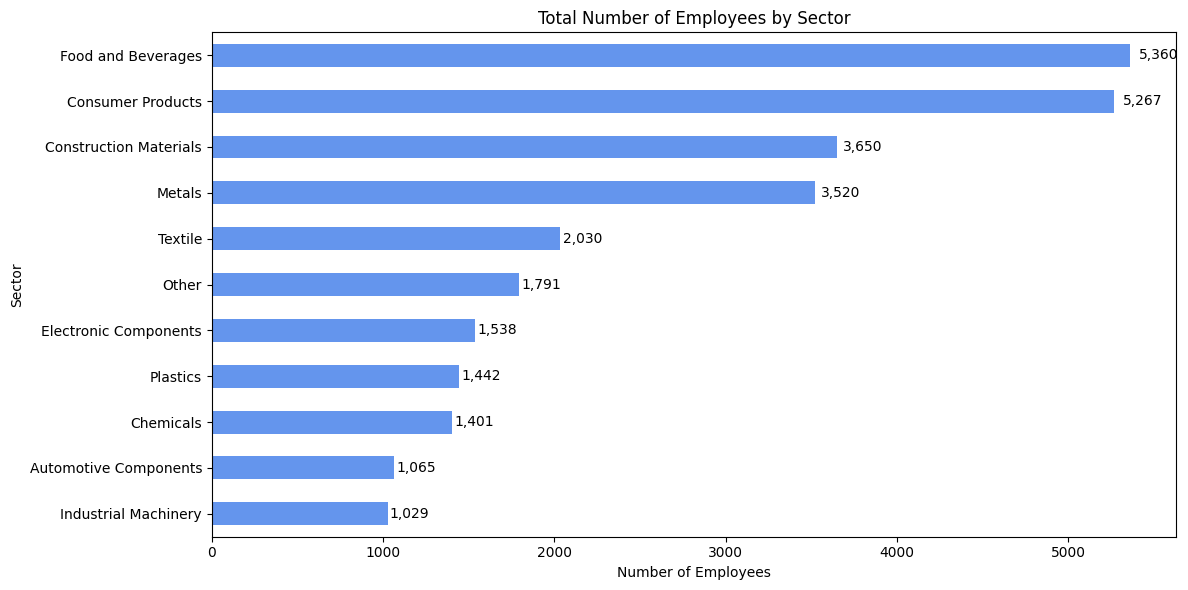

In [23]:

# Prepare data
sector_employees = df_renamed.groupby("sector_map")[["num_employees"]].sum().sort_values("num_employees")

# Plot
ax = sector_employees.plot(kind="barh", figsize=(12, 6), legend=False, color="cornflowerblue")
plt.title("Total Number of Employees by Sector")
plt.xlabel("Number of Employees")
plt.ylabel("Sector")

# Add labels
for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + (width * 0.01 if width > 0 else 100),
            bar.get_y() + bar.get_height() / 2,
            f"{int(width):,}",
            va='center')

plt.tight_layout()
plt.show()


In [24]:
df_renamed

sector  annual_turnover  return_on_sales  exports_percent  num_employees  \
0      32.0        1073924.0              3.0              3.0           16.0   
1      32.0              NaN              3.0              NaN            7.0   
2      32.0         900000.0              5.0              4.0           13.0   
3      32.0        6500000.0              4.0              4.0           72.0   
4      32.0        3839360.0              5.0              2.0           46.0   
..      ...              ...              ...              ...            ...   
501    11.0        1000000.0              1.0              1.0            7.0   
502    16.0         815110.0              NaN              3.0           31.0   
503    13.0        2192224.0              2.0              3.0           61.0   
504    16.0       10964752.0              2.0              4.0          216.0   
505    25.0         528606.0              5.0              1.0            9.0   

     gross_profit  net_profit  ERP production_planning_software  \
0         36551.0     30752.0                               2.0   
1             NaN         NaN                               3.0   
2             NaN         NaN                               1.0   
3             NaN         NaN                               5.0   
4        327308.0    273056.0                               1.0   
..            ...         ...                               ...   
501           NaN         NaN                               2.0   
502        2215.0      2115.0                               NaN   
503      148542.0    148542.0                               2.0   
504     -190611.0   -190611.0                               4.0   
505           NaN         NaN                               NaN   

     order_tracking_software  MES integrated_operations_software  ...  \
0                        4.0                                 4.0  ...   
1                        5.0                                 NaN  ...   
2                        1.0                                 1.0  ...   
3                        4.0                                 5.0  ...   
4                        5.0                                 5.0  ...   
..                       ...                                 ...  ...   
501                      4.0                                 2.0  ...   
502                      NaN                                 NaN  ...   
503                      2.0                                 2.0  ...   
504                      4.0                                 4.0  ...   
505                      NaN                                 NaN  ...   

     ar_maintenance_management  automated_production_lines  \
0                          2.0                         2.0   
1                          NaN                         NaN   
2                          1.0                         1.0   
3                          NaN                         NaN   
4                          1.0                         1.0   
..                         ...                         ...   
501                        1.0                         1.0   
502                        NaN                         NaN   
503                        2.0                         1.0   
504                        4.0                         3.0   
505                        NaN                         NaN   

     autonomous_production_control  autonomous_data_analysis  \
0                              3.0                       2.0   
1                              NaN                       NaN   
2                              1.0                       1.0   
3                              NaN                       NaN   
4                              1.0                       1.0   
..                             ...                       ...   
501                            2.0                       5.0   
502                            2.0                       1.0   
503                          

In [25]:
df_clean = df_renamed.dropna(subset=["annual_turnover"]).copy()

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clean[["scaled_turnover", "scaled_employees"]] = scaler.fit_transform(
    df_clean[["annual_turnover", "num_employees"]]
)
df_clean["performance_score"] = df_clean[["scaled_turnover", "scaled_employees"]].mean(axis=1)


In [27]:
# Top 25% based on performance_score
threshold = df_clean["performance_score"].quantile(0.75)

df_clean["performance_class"] = df_clean["performance_score"].apply(
    lambda x: "Top Performing" if x >= threshold else "Other"
)


Text(0.5, 1.0, 'Size Score Distribution (Turnover + Employees)')

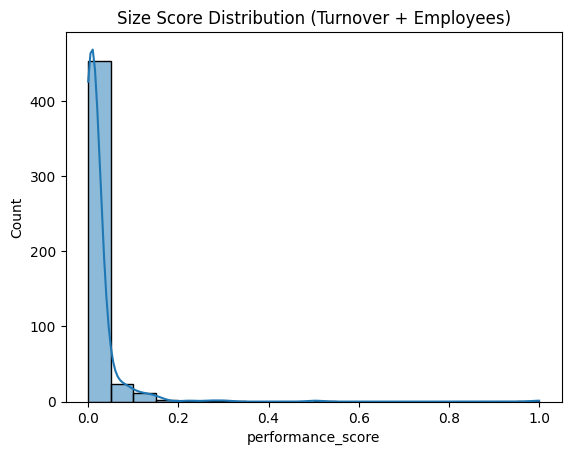

In [28]:
import seaborn as sns
sns.histplot(df_clean["performance_score"], bins=20, kde=True)
plt.title("Size Score Distribution (Turnover + Employees)")


In [29]:
df_clean.head()

sector  annual_turnover  return_on_sales  exports_percent  num_employees  \
0    32.0        1073924.0              3.0              3.0           16.0   
2    32.0         900000.0              5.0              4.0           13.0   
3    32.0        6500000.0              4.0              4.0           72.0   
4    32.0        3839360.0              5.0              2.0           46.0   
5    32.0         752837.0              4.0              3.0           44.0   

   gross_profit  net_profit  ERP production_planning_software  \
0       36551.0     30752.0                               2.0   
2           NaN         NaN                               1.0   
3           NaN         NaN                               5.0   
4      327308.0    273056.0                               1.0   
5           NaN         NaN                               2.0   

   order_tracking_software  MES integrated_operations_software  ...  \
0                      4.0                                 4.0  ...   
2                      1.0                                 1.0  ...   
3                      4.0                                 5.0  ...   
4                      5.0                                 5.0  ...   
5                      4.0                                 3.0  ...   

   info_sharing_with_suppliers  collaborative_planning_with_suppliers  \
0                          2.0                                    2.0   
2                          1.0                                    1.0   
3                          5.0                                    5.0   
4                          1.0                                    1.0   
5                          2.0                                    4.0   

   system_integration_with_suppliers       sector_name         sector_map  \
0                                3.0  Other production  Consumer Products   
2                                NaN  Other production  Consumer Products   
3                                NaN  Other production  Consumer Products   
4                                1.0  Other production  Consumer Products   
5                                2.0  Other production  Consumer Products   

   company_size_group  scaled_turnover  scaled_employees  performance_score  \
0               10‚Äì49         0.000252          0.010593           0.005422   
2               10‚Äì49         0.000211          0.008475           0.004343   
3              50‚Äì249         0.001524          0.050141           0.025833   
4               10‚Äì49         0.000900          0.031780           0.016340   
5               10‚Äì49         0.000176          0.030367           0.015272   

   performance_class  
0              Other  
2              Other  
3     Top Performing  
4              Other  
5              Other  

[5 rows x 47 columns]

<ipython-input-30-2c9dfa7e04ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_clean, x="performance_class", palette="viridis")


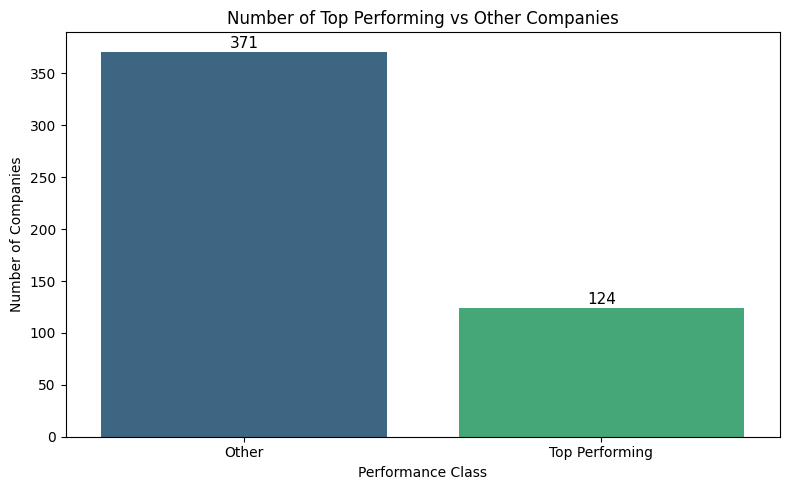

In [30]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_clean, x="performance_class", palette="viridis")

# Add labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 1,
            str(count),
            ha='center', va='bottom', fontsize=11)

# Set titles and labels
plt.title("Number of Top Performing vs Other Companies")
plt.xlabel("Performance Class")
plt.ylabel("Number of Companies")
plt.tight_layout()
plt.show()

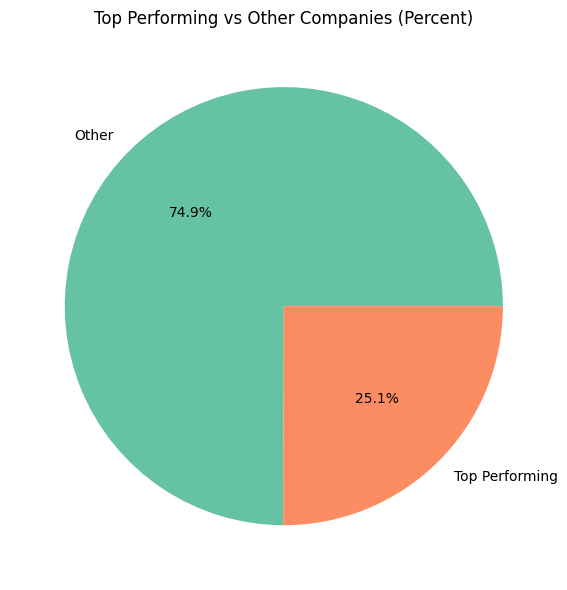

In [31]:
# Count and calculate percentages
performance_counts = df_clean["performance_class"].value_counts()
performance_percent = performance_counts / performance_counts.sum() * 100

# Plot as pie chart
plt.figure(figsize=(6, 6))
plt.pie(performance_percent, labels=performance_percent.index, autopct="%.1f%%", colors=["#66c2a5", "#fc8d62"])
plt.title("Top Performing vs Other Companies (Percent)")

plt.tight_layout()
plt.show()


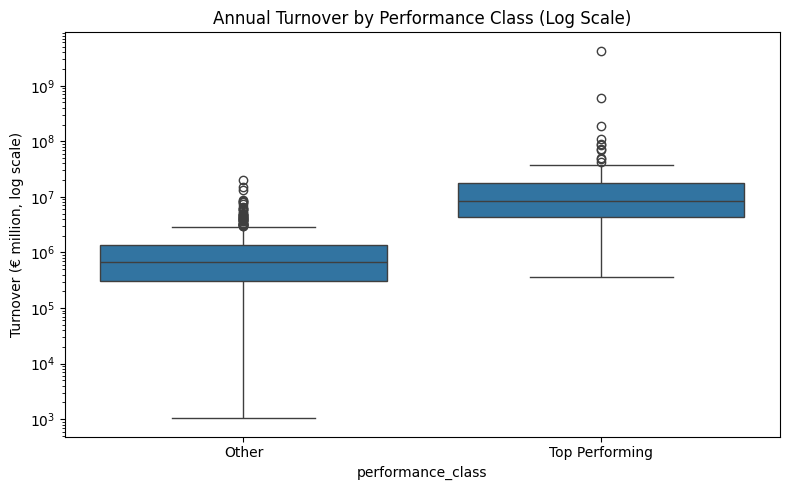

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="performance_class", y="annual_turnover")
plt.yscale("log")  # üîç Compresses large values
plt.title("Annual Turnover by Performance Class (Log Scale)")
plt.ylabel("Turnover (‚Ç¨ million, log scale)")
plt.tight_layout()
plt.show()


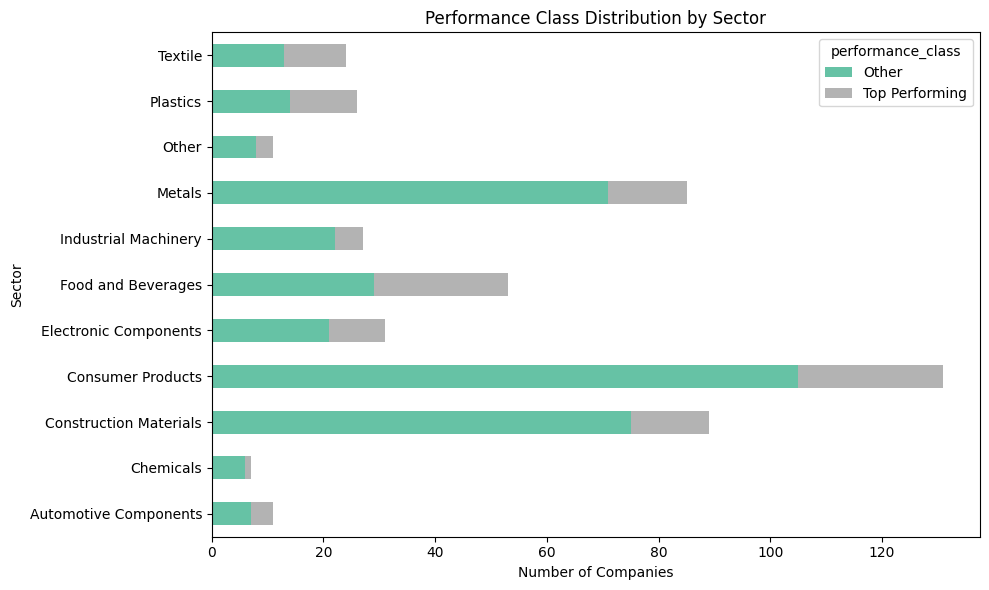

In [33]:
pd.crosstab(df_clean["sector_map"], df_clean["performance_class"]).plot(
    kind="barh", stacked=True, figsize=(10, 6), colormap="Set2"
)
plt.title("Performance Class Distribution by Sector")
plt.xlabel("Number of Companies")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


In [34]:
digital_df = df_clean.copy()

In [35]:
digital_functions = {
    "Production Planning and Control": [
        "ERP production_planning_software",      # Q018.1
        "order_tracking_software",               # Q018.2
        "MES integrated_operations_software"     # Q018.3
    ],
    "Automation and Robotics": [
        "industrial_robots_usage",               # Q019.1
        "collaborative_robots_usage",            # Q019.2
        "process_automation"                     # Q019.3
    ],
    "Design and Prototyping": [
        "cad_software_usage",                    # Q020.1
        "cnc_equipment_usage",                   # Q020.2
        "3d_printing_prototyping"                # Q020.3
    ],
    "Human-Machine Interaction (HMI)": [
        "shopfloor_tablet_use",                  # Q021.1
        "interactive_production_instructions",   # Q021.2
        "paperless_production",                  # Q021.3
        "ar_asset_identification",               # Q026.1
        "ar_training",                           # Q026.2
        "ar_maintenance_management"              # Q026.3
    ],
    "Data Management and Analytics": [
        "inventory_tracking_raw_materials",      # Q022.1
        "automatic_ordering_solutions",          # Q022.2
        "inventory_tracking_finished_goods",     # Q022.3
        "work_center_data_collection",           # Q023.1
        "wip_tracking_rfid_barcode",             # Q023.2
        "downtime_data_collection",              # Q023.3
        "ai_quality_control",                    # Q024.1
        "ai_demand_forecasting",                 # Q024.2
        "ai_predictive_maintenance",             # Q024.3
        "simulation_root_cause_analysis",        # Q025.1
        "process_mining",                        # Q025.2
        "simulation_schedule_prediction"         # Q025.3
    ],
    "Supply Chain Integration": [
        "info_sharing_with_suppliers",           # Q028.1
        "collaborative_planning_with_suppliers", # Q028.2
        "system_integration_with_suppliers"      # Q028.3
    ]
}


In [36]:
digital_df

sector  annual_turnover  return_on_sales  exports_percent  num_employees  \
0      32.0        1073924.0              3.0              3.0           16.0   
2      32.0         900000.0              5.0              4.0           13.0   
3      32.0        6500000.0              4.0              4.0           72.0   
4      32.0        3839360.0              5.0              2.0           46.0   
5      32.0         752837.0              4.0              3.0           44.0   
..      ...              ...              ...              ...            ...   
501    11.0        1000000.0              1.0              1.0            7.0   
502    16.0         815110.0              NaN              3.0           31.0   
503    13.0        2192224.0              2.0              3.0           61.0   
504    16.0       10964752.0              2.0              4.0          216.0   
505    25.0         528606.0              5.0              1.0            9.0   

     gross_profit  net_profit  ERP production_planning_software  \
0         36551.0     30752.0                               2.0   
2             NaN         NaN                               1.0   
3             NaN         NaN                               5.0   
4        327308.0    273056.0                               1.0   
5             NaN         NaN                               2.0   
..            ...         ...                               ...   
501           NaN         NaN                               2.0   
502        2215.0      2115.0                               NaN   
503      148542.0    148542.0                               2.0   
504     -190611.0   -190611.0                               4.0   
505           NaN         NaN                               NaN   

     order_tracking_software  MES integrated_operations_software  ...  \
0                        4.0                                 4.0  ...   
2                        1.0                                 1.0  ...   
3                        4.0                                 5.0  ...   
4                        5.0                                 5.0  ...   
5                        4.0                                 3.0  ...   
..                       ...                                 ...  ...   
501                      4.0                                 2.0  ...   
502                      NaN                                 NaN  ...   
503                      2.0                                 2.0  ...   
504                      4.0                                 4.0  ...   
505                      NaN                                 NaN  ...   

     info_sharing_with_suppliers  collaborative_planning_with_suppliers  \
0                            2.0                                    2.0   
2                            1.0                                    1.0   
3                            5.0                                    5.0   
4                            1.0                                    1.0   
5                            2.0                                    4.0   
..                           ...                                    ...   
501                          2.0                                    1.0   
502                          3.0                                    3.0   
503                          4.0                                    3.0   
504                          4.0                                    3.0   
505                          NaN                                    NaN   

     system_integration_with_suppliers  \
0                                  3.0   
2                                  NaN   
3                                  NaN   
4                                  1.0   
5                                  2.0   
..                                 ...   
501                                3.0   
502                                2.0   
503                                3.0   
504                          

In [37]:
# Bin turnover into revenue groups (optional tuning)
digital_df["revenue_group"] = pd.qcut(
    digital_df["annual_turnover"],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)


In [38]:
question_groups = {
    "Q018": ["ERP production_planning_software", "order_tracking_software", "MES integrated_operations_software"],
    "Q019": ["industrial_robots_usage", "collaborative_robots_usage", "process_automation"],
    "Q020": ["cad_software_usage", "cnc_equipment_usage", "3d_printing_prototyping"],
    "Q021": ["shopfloor_tablet_use", "interactive_production_instructions", "paperless_production"],
    "Q022": ["inventory_tracking_raw_materials", "automatic_ordering_solutions", "inventory_tracking_finished_goods"],
    "Q023": ["work_center_data_collection", "wip_tracking_rfid_barcode", "downtime_data_collection"],
    "Q024": ["ai_quality_control", "ai_demand_forecasting", "ai_predictive_maintenance"],
    "Q025": ["simulation_root_cause_analysis", "process_mining", "simulation_schedule_prediction"],
    "Q026": ["ar_asset_identification", "ar_training", "ar_maintenance_management"],
    "Q027": ["automated_production_lines", "autonomous_production_control", "autonomous_data_analysis"],
    "Q028": ["info_sharing_with_suppliers", "collaborative_planning_with_suppliers", "system_integration_with_suppliers"]
}


In [39]:
for group, cols in question_groups.items():
    for col in cols:
        digital_df[col] = digital_df.groupby(
            ["sector_map", "company_size_group", "revenue_group"], observed=True
        )[col].transform(lambda x: x.fillna(x.median()))


In [40]:
digital_df

sector  annual_turnover  return_on_sales  exports_percent  num_employees  \
0      32.0        1073924.0              3.0              3.0           16.0   
2      32.0         900000.0              5.0              4.0           13.0   
3      32.0        6500000.0              4.0              4.0           72.0   
4      32.0        3839360.0              5.0              2.0           46.0   
5      32.0         752837.0              4.0              3.0           44.0   
..      ...              ...              ...              ...            ...   
501    11.0        1000000.0              1.0              1.0            7.0   
502    16.0         815110.0              NaN              3.0           31.0   
503    13.0        2192224.0              2.0              3.0           61.0   
504    16.0       10964752.0              2.0              4.0          216.0   
505    25.0         528606.0              5.0              1.0            9.0   

     gross_profit  net_profit  ERP production_planning_software  \
0         36551.0     30752.0                               2.0   
2             NaN         NaN                               1.0   
3             NaN         NaN                               5.0   
4        327308.0    273056.0                               1.0   
5             NaN         NaN                               2.0   
..            ...         ...                               ...   
501           NaN         NaN                               2.0   
502        2215.0      2115.0                               2.0   
503      148542.0    148542.0                               2.0   
504     -190611.0   -190611.0                               4.0   
505           NaN         NaN                               2.0   

     order_tracking_software  MES integrated_operations_software  ...  \
0                        4.0                                 4.0  ...   
2                        1.0                                 1.0  ...   
3                        4.0                                 5.0  ...   
4                        5.0                                 5.0  ...   
5                        4.0                                 3.0  ...   
..                       ...                                 ...  ...   
501                      4.0                                 2.0  ...   
502                      2.0                                 2.0  ...   
503                      2.0                                 2.0  ...   
504                      4.0                                 4.0  ...   
505                      3.0                                 4.0  ...   

     collaborative_planning_with_suppliers  system_integration_with_suppliers  \
0                                      2.0                                3.0   
2                                      1.0                                2.0   
3                                      5.0                                2.0   
4                                      1.0                                1.0   
5                                      4.0                                2.0   
..                                     ...                                ...   
501                                    1.0                                3.0   
502                                    3.0                                2.0   
503                                    3.0                                3.0   
504                                    3.0                                3.0   
505                                    2.0                                2.0   

                                           sector_name  \
0                                     Other production   
2                                     Other production   
3                                     Other production   
4                                     Other production   
5                                     Other production   
..                           

In [41]:
# Fallback: fill remaining with median of the full column
for col in sum(question_groups.values(), []):
    digital_df[col] = digital_df[col].fillna(digital_df[col].median())


In [42]:
digital_df.isna().sum()

sector                                     0
annual_turnover                            0
return_on_sales                          133
exports_percent                          100
num_employees                              0
gross_profit                             134
net_profit                               134
ERP production_planning_software           0
order_tracking_software                    0
MES integrated_operations_software         0
industrial_robots_usage                    0
collaborative_robots_usage                 0
process_automation                         0
cad_software_usage                         0
cnc_equipment_usage                        0
3d_printing_prototyping                    0
shopfloor_tablet_use                       0
interactive_production_instructions        0
paperless_production                       0
inventory_tracking_raw_materials           0
automatic_ordering_solutions               0
inventory_tracking_finished_goods          0
work_center_data_collection                0
wip_tracking_rfid_barcode                  0
downtime_data_collection                   0
ai_quality_control                         0
ai_demand_forecasting                      0
ai_predictive_maintenance                  0
simulation_root_cause_analysis             0
process_mining                             0
simulation_schedule_prediction             0
ar_asset_identification                    0
ar_training                                0
ar_maintenance_management                  0
automated_production_lines                 0
autonomous_production_control              0
autonomous_data_analysis                   0
info_sharing_with_suppliers                0
collaborative_planning_with_suppliers      0
system_integration_with_suppliers          0
sector_name                                0
sector_map                                 0
company_size_group                         0
scaled_turnover                            0
scaled_employees                           0
performance_score                          0
performance_class                          0
revenue_group                              0
dtype: int64

In [43]:
digital_dfc = digital_df.copy()

In [44]:
# Use the digital_functions dict (already mapped earlier)
for func, cols in digital_functions.items():
    digital_dfc[f"{func}_score"] = digital_dfc[cols].mean(axis=1)


In [45]:
function_score_cols = [f"{func}_score" for func in digital_functions]
digital_dfc["digitalization_score"] = digital_dfc[function_score_cols].mean(axis=1)


In [46]:
def classify_digital_level(score):
    if score >= 4:
        return "High"
    elif score >= 2.5:
        return "Medium"
    else:
        return "Low"

digital_dfc["digitalization_level"] = digital_dfc["digitalization_score"].apply(classify_digital_level)


In [47]:
digital_dfc

sector  annual_turnover  return_on_sales  exports_percent  num_employees  \
0      32.0        1073924.0              3.0              3.0           16.0   
2      32.0         900000.0              5.0              4.0           13.0   
3      32.0        6500000.0              4.0              4.0           72.0   
4      32.0        3839360.0              5.0              2.0           46.0   
5      32.0         752837.0              4.0              3.0           44.0   
..      ...              ...              ...              ...            ...   
501    11.0        1000000.0              1.0              1.0            7.0   
502    16.0         815110.0              NaN              3.0           31.0   
503    13.0        2192224.0              2.0              3.0           61.0   
504    16.0       10964752.0              2.0              4.0          216.0   
505    25.0         528606.0              5.0              1.0            9.0   

     gross_profit  net_profit  ERP production_planning_software  \
0         36551.0     30752.0                               2.0   
2             NaN         NaN                               1.0   
3             NaN         NaN                               5.0   
4        327308.0    273056.0                               1.0   
5             NaN         NaN                               2.0   
..            ...         ...                               ...   
501           NaN         NaN                               2.0   
502        2215.0      2115.0                               2.0   
503      148542.0    148542.0                               2.0   
504     -190611.0   -190611.0                               4.0   
505           NaN         NaN                               2.0   

     order_tracking_software  MES integrated_operations_software  ...  \
0                        4.0                                 4.0  ...   
2                        1.0                                 1.0  ...   
3                        4.0                                 5.0  ...   
4                        5.0                                 5.0  ...   
5                        4.0                                 3.0  ...   
..                       ...                                 ...  ...   
501                      4.0                                 2.0  ...   
502                      2.0                                 2.0  ...   
503                      2.0                                 2.0  ...   
504                      4.0                                 4.0  ...   
505                      3.0                                 4.0  ...   

     performance_class  revenue_group  Production Planning and Control_score  \
0                Other           High                               3.333333   
2                Other         Medium                               1.000000   
3       Top Performing      Very High                               4.666667   
4                Other           High                               3.666667   
5                Other         Medium                               3.000000   
..                 ...            ...                                    ...   
501              Other         Medium                               2.666667   
502              Other         Medium                               2.000000   
503     Top Performing           High                               2.000000   
504     Top Performing      Very High                               4.000000   
505              Other         Medium                               3.000000   

     Automation and Robotics_score  Design and Prototyping_score  \
0                         2.333333                      3.000000   
2                         2.333333                      2.000000   
3                         2.333333                      4.333333   
4                         1.000000                      3.333333   
5                         4.333333               

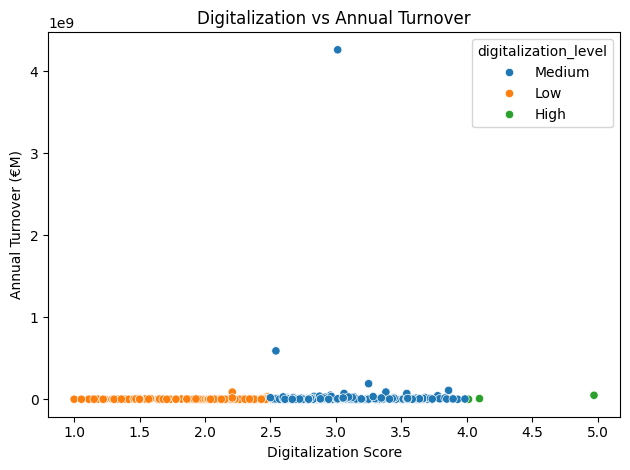

In [48]:
sns.scatterplot(data=digital_dfc, x="digitalization_score", y="annual_turnover", hue="digitalization_level")
plt.title("Digitalization vs Annual Turnover")
plt.xlabel("Digitalization Score")
plt.ylabel("Annual Turnover (‚Ç¨M)")
plt.tight_layout()
plt.show()


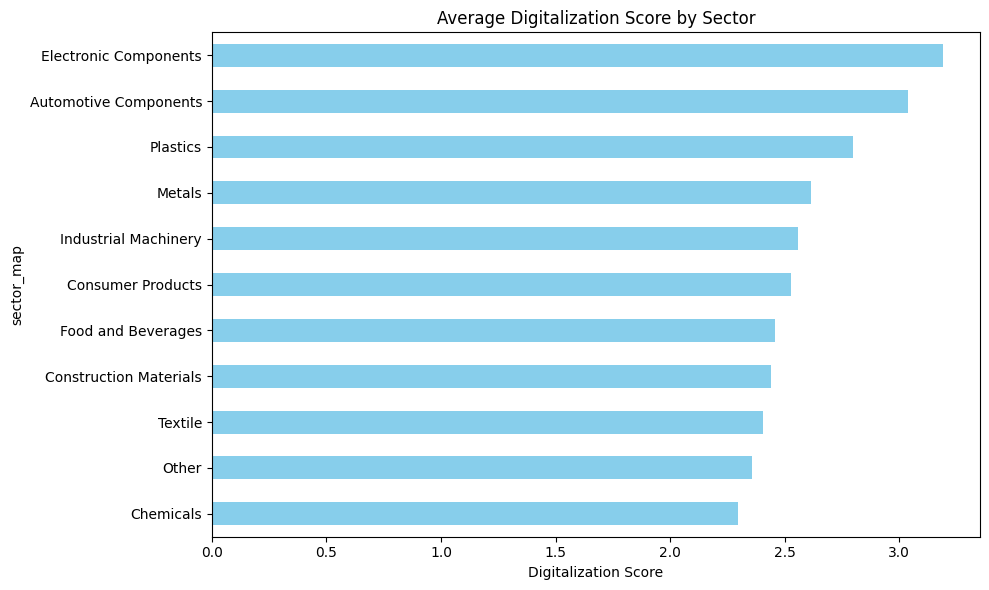

In [49]:
sector_digi = digital_dfc.groupby("sector_map")["digitalization_score"].mean().sort_values()

sector_digi.plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.title("Average Digitalization Score by Sector")
plt.xlabel("Digitalization Score")
plt.tight_layout()
plt.show()


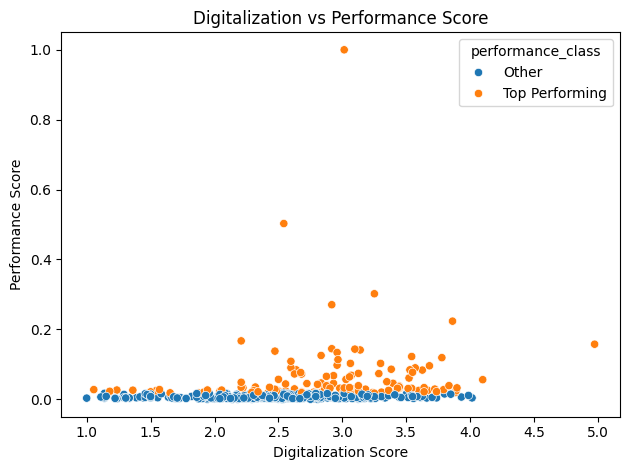

In [50]:
sns.scatterplot(data=digital_dfc, x="digitalization_score", y="performance_score", hue="performance_class")
plt.title("Digitalization vs Performance Score")
plt.xlabel("Digitalization Score")
plt.ylabel("Performance Score")
plt.tight_layout()
plt.show()


In [51]:
function_score_cols = [f"{func}_score" for func in digital_functions]


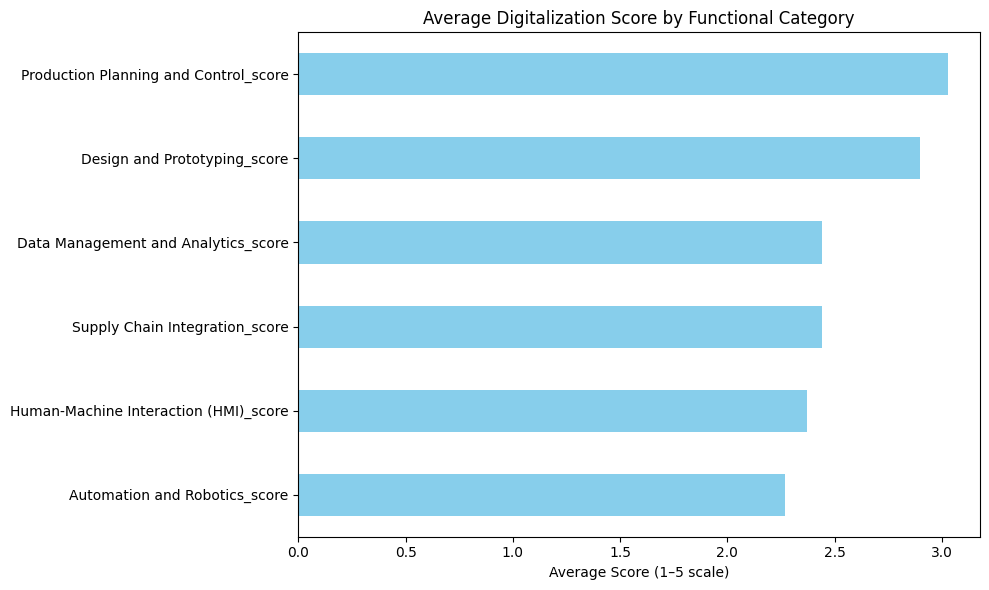

In [54]:
# Average digitalization score per function
function_means = digital_dfc[function_score_cols].mean().sort_values()

plt.figure(figsize=(10, 6))
function_means.plot(kind="barh", color="skyblue")
plt.title("Average Digitalization Score by Functional Category")
plt.xlabel("Average Score (1‚Äì5 scale)")
plt.tight_layout()
plt.show()


<ipython-input-55-d5d4d68add19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Function", y="Score", palette="coolwarm")


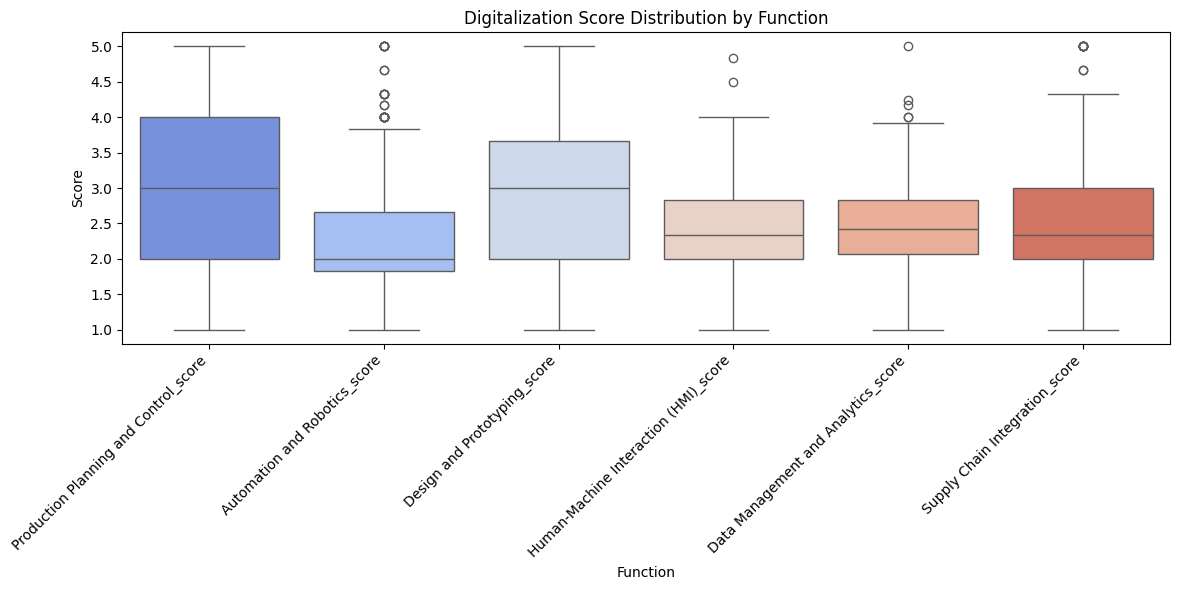

In [55]:

# Melt for seaborn boxplot format
df_melted = digital_dfc[function_score_cols].melt(var_name="Function", value_name="Score")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Function", y="Score", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Digitalization Score Distribution by Function")
plt.tight_layout()
plt.show()


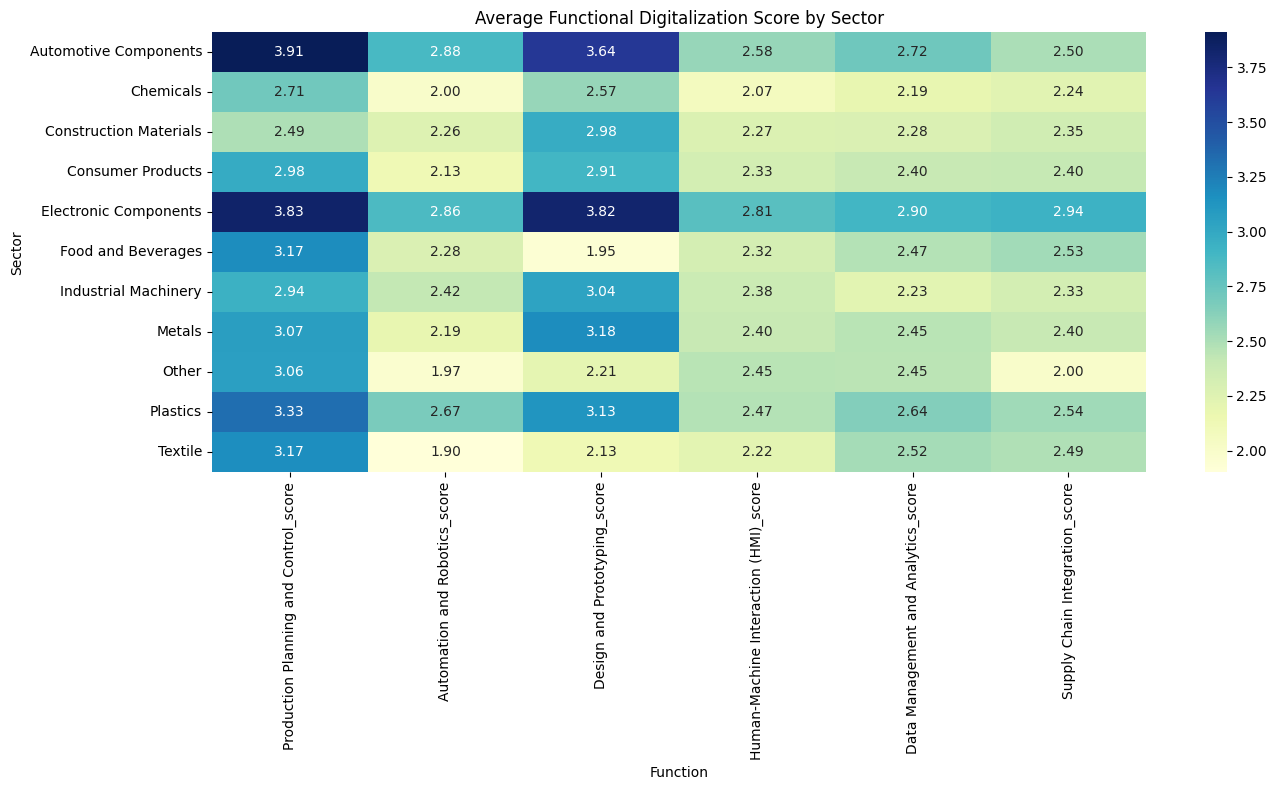

In [56]:


# Group by sector_map and get mean functional scores
sector_func_scores = digital_dfc.groupby("sector_map")[function_score_cols].mean()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(sector_func_scores, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Functional Digitalization Score by Sector")
plt.xlabel("Function")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


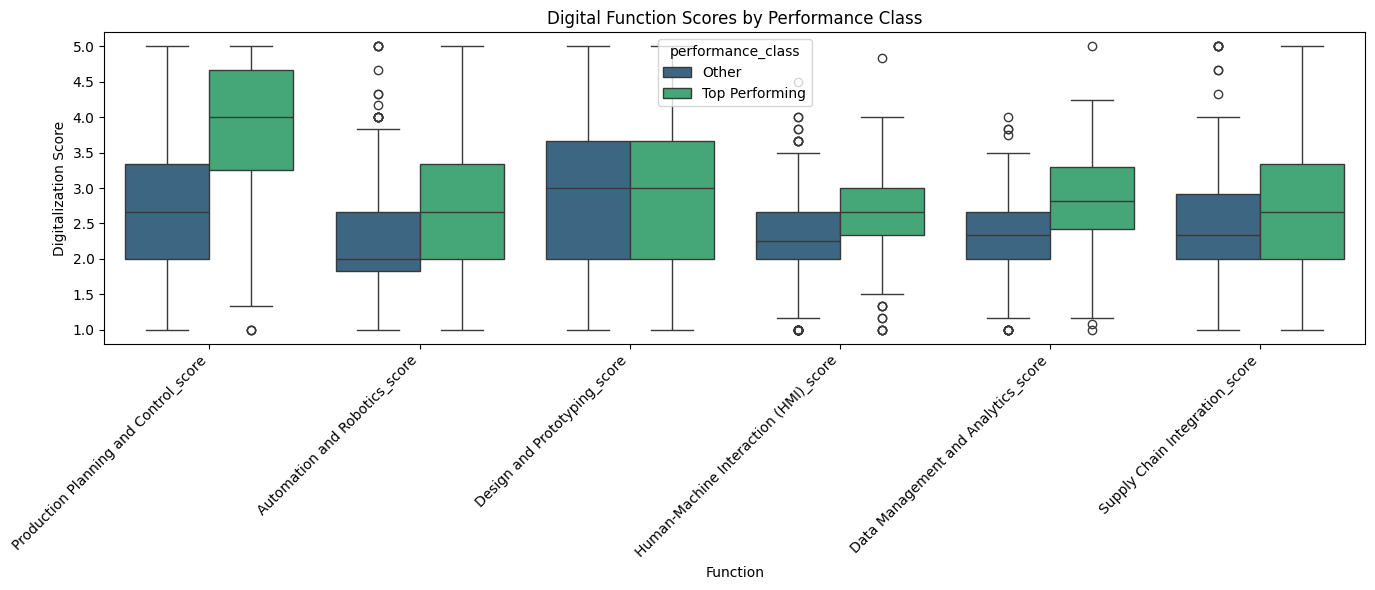

In [57]:

# Melt data for seaborn
df_melted = digital_dfc.melt(
    id_vars="performance_class",
    value_vars=function_score_cols,
    var_name="Function",
    value_name="Score"
)

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_melted, x="Function", y="Score", hue="performance_class", palette="viridis")
plt.title("Digital Function Scores by Performance Class")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Digitalization Score")
plt.tight_layout()
plt.show()


In [58]:
# Select numeric columns for correlation
correlation_cols = function_score_cols + [
    "digitalization_score",
    "performance_score",
    "annual_turnover",
]

# Compute correlation matrix
corr_matrix = digital_dfc[correlation_cols].corr()


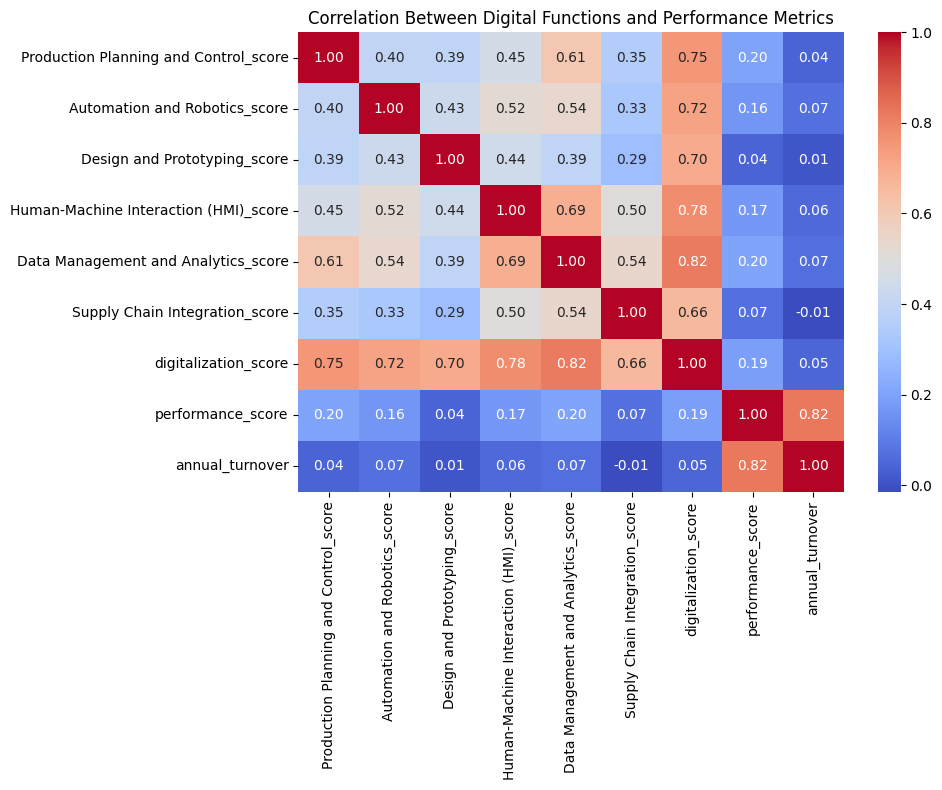

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Digital Functions and Performance Metrics")
plt.tight_layout()
plt.show()


<ipython-input-60-1cc9a9d0b78a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=digital_dfc, x="company_size_group", y="digitalization_score", palette="Spectral")


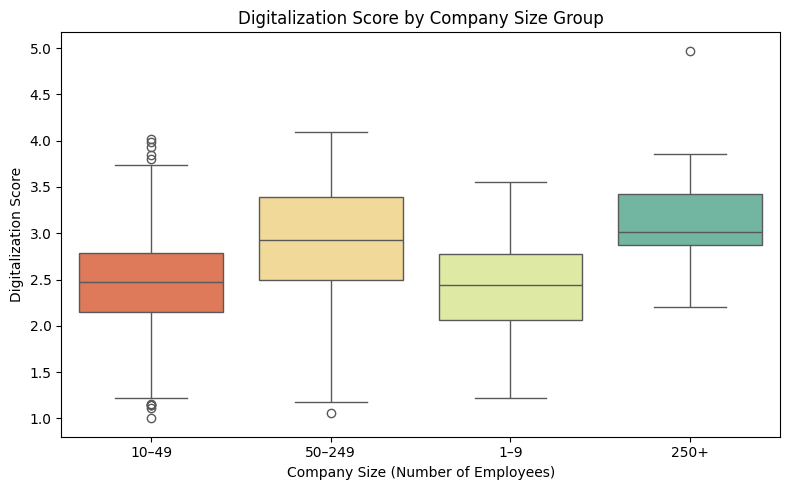

In [60]:


plt.figure(figsize=(8, 5))
sns.boxplot(data=digital_dfc, x="company_size_group", y="digitalization_score", palette="Spectral")
plt.title("Digitalization Score by Company Size Group")
plt.xlabel("Company Size (Number of Employees)")
plt.ylabel("Digitalization Score")
plt.tight_layout()
plt.show()


In [61]:
# Group by company size group and calculate mean for each function
size_func_scores = digital_dfc.groupby("company_size_group")[function_score_cols].mean()


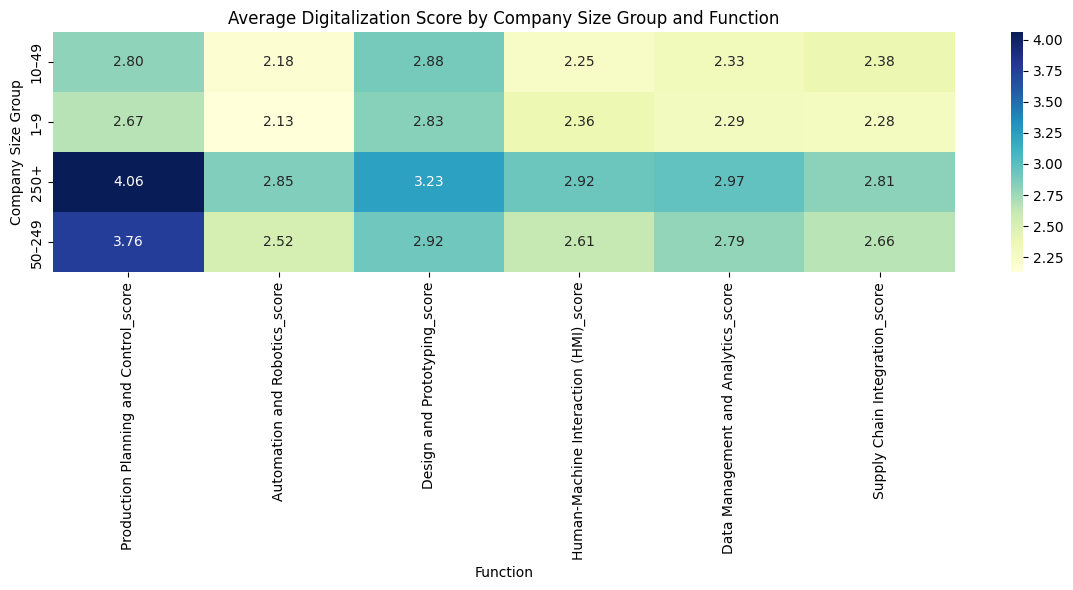

In [62]:


plt.figure(figsize=(12, 6))
sns.heatmap(size_func_scores, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Digitalization Score by Company Size Group and Function")
plt.xlabel("Function")
plt.ylabel("Company Size Group")
plt.tight_layout()
plt.show()
